In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import randint, uniform
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('./kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df['house_renovated'] = (df['yr_renovated']>0).astype(int)

In [4]:
df.shape

(21613, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21613 non-null  int64  
 1   date             21613 non-null  object 
 2   price            21613 non-null  float64
 3   bedrooms         21613 non-null  int64  
 4   bathrooms        21613 non-null  float64
 5   sqft_living      21613 non-null  int64  
 6   sqft_lot         21613 non-null  int64  
 7   floors           21613 non-null  float64
 8   waterfront       21613 non-null  int64  
 9   view             21613 non-null  int64  
 10  condition        21613 non-null  int64  
 11  grade            21613 non-null  int64  
 12  sqft_above       21613 non-null  int64  
 13  sqft_basement    21613 non-null  int64  
 14  yr_built         21613 non-null  int64  
 15  yr_renovated     21613 non-null  int64  
 16  zipcode          21613 non-null  int64  
 17  lat         

In [6]:
df['yr_built'].value_counts()

yr_built
2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64

In [7]:
X = df[['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'yr_built', 'sqft_above', 'sqft_basement', 'grade', 'view', 'condition', 'house_renovated', 'long', 'lat']]
y = df['price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    tree_method='hist'
)

In [10]:
param_dist = {
    'n_estimators': randint(50, 600),            
    'max_depth': randint(3, 10),               
    'learning_rate': uniform(0.01, 0.2),          
    'subsample': uniform(0.6, 0.4),               
    'colsample_bytree': uniform(0.6, 0.4),        
    'gamma': uniform(0, 0.5),                    
    'reg_alpha': uniform(0, 0.5),                 
    'reg_lambda': uniform(0.5, 1)         
}

In [11]:
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=100,
    scoring='neg_root_mean_squared_error',
    cv=10,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [12]:
random_search.fit( X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.15639878836228102, max_depth=7, n_estimators=70, reg_alpha=0.07800932022121826, reg_lambda=0.6559945203362026, subsample=0.6232334448672797; total time=   0.6s
[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.15639878836228102, max_depth=7, n_estimators=70, reg_alpha=0.07800932022121826, reg_lambda=0.6559945203362026, subsample=0.6232334448672797; total time=   0.5s
[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.15639878836228102, max_depth=7, n_estimators=70, reg_alpha=0.07800932022121826, reg_lambda=0.6559945203362026, subsample=0.6232334448672797; total time=   0.5s
[CV] END colsample_bytree=0.749816047538945, gamma=0.4753571532049581, learning_rate=0.15639878836228102, max_depth=7, n_estimators=70, reg_alpha=0.07800932022121826, reg_lambda=0.65599452033620

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constrain...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7805cad83800>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7805adc66060>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7805adc661b0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7805adc65d60>},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [13]:
best_model = random_search.best_estimator_
random_search.best_params_

{'colsample_bytree': np.float64(0.6546485325768115),
 'gamma': np.float64(0.3544554984550593),
 'learning_rate': np.float64(0.12056399538158155),
 'max_depth': 4,
 'n_estimators': 587,
 'reg_alpha': np.float64(0.4050566973395904),
 'reg_lambda': np.float64(1.3670723185801037),
 'subsample': np.float64(0.9652962210225885)}

In [14]:
importances = best_model.feature_importances_
feature_names = X_train.columns


In [15]:
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df = importance_df.sort_values('importance', ascending=False)

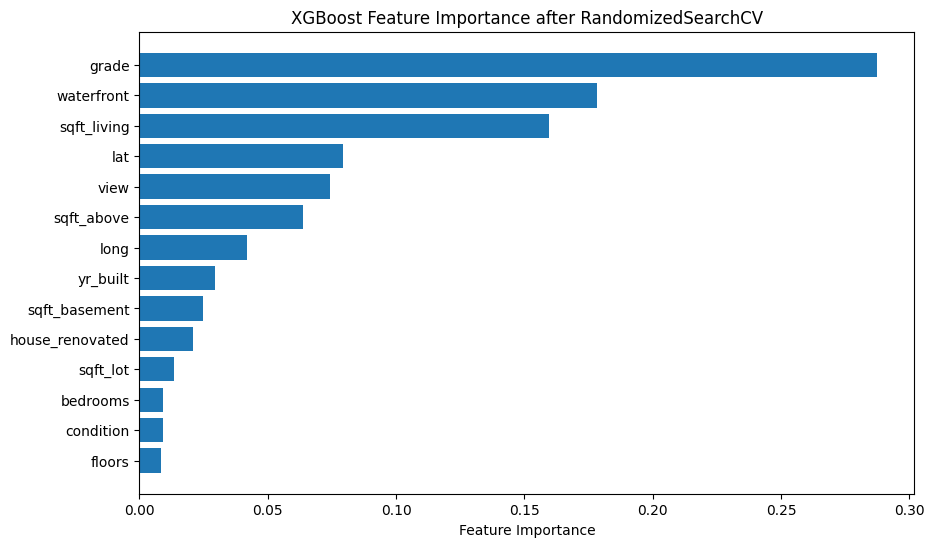

In [16]:
plt.figure(figsize=(10,6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance after RandomizedSearchCV')
plt.show()


In [17]:
y_pred_test = best_model.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

In [19]:
mse, r2

(15760612522.871786, 0.8957470877122017)

In [20]:
import joblib

joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']